In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import kaplanmeier as km
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
df_train, df_test = pd.read_csv("training.txt", header=None), pd.read_csv("test.txt", header=None)
df_train.columns, df_test.columns = ["Cenus", "Ac", "y", "stime"], ["Cenus", "Ac", "y", "stime"]
print(df_train.head(), df_test.head(), sep="\n")

      Cenus        Ac  y      stime
0  0.091994 -0.161677  0  12.799715
1 -3.881970  1.670968  0   5.902928
2  0.342120 -1.265719  0   5.634613
3  4.161637 -1.831977  0  12.764122
4  0.719379 -1.103297  0  17.404875
      Cenus        Ac  y      stime
0 -2.493657 -0.194889  0   5.823528
1 -0.668555  0.763680  0  17.448681
2  3.113353 -1.058320  0  17.692355
3  2.227625 -1.077320  0  17.626645
4 -3.397397  0.584305  0  17.536294


## SVM with a custom kernel

In [ ]:
def kernel(X, Y):
    '''Custom sigmoid kernel'''
    M = np.array([[1, .1], [0., 1.75]]) # rotation
    alpha, b, c = .0005, 10., .75  # hyper-parameters
    f = lambda x: np.tanh(x) # general sigmoid :) 
    
    return f(alpha*np.dot(np.dot(X, M), Y.T)+c)*b

def model(df,kernel): return SVC(C=5, kernel=kernel, class_weight="balanced").fit(df_train.iloc[:,:2], df_train.iloc[:,2])

In [ ]:
classifier =  model(df_train, kernel)

In [ ]:
def decision_boundary(classifier, df, show=None):

    disp = DecisionBoundaryDisplay.from_estimator(
    classifier, df.iloc[:,:2], response_method="predict",
    xlabel="Cenus", 
    ylabel="Ac",
    alpha=0.2)
    
    if show:
        disp.ax_.scatter(df.Cenus[df.y==0], df.Ac[df.y==0], s=df.y[df.y==0]+100, 
            marker='o',
            color='blue',
            label='Control', alpha=0.2);
        plt.scatter(df.Cenus[df.y==1], df.Ac[df.y==1], s=df.y[df.y==1]+100, 
            marker='d',
            color='red',
            label='Case', alpha=0.8);
        plt.show();
    return disp 

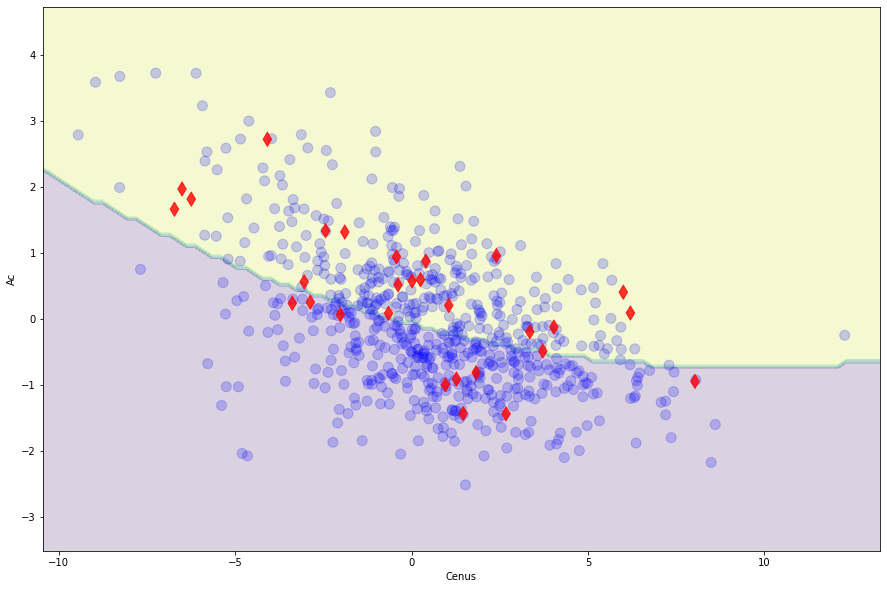

In [ ]:
db = decision_boundary(classifier,df_train, 1)

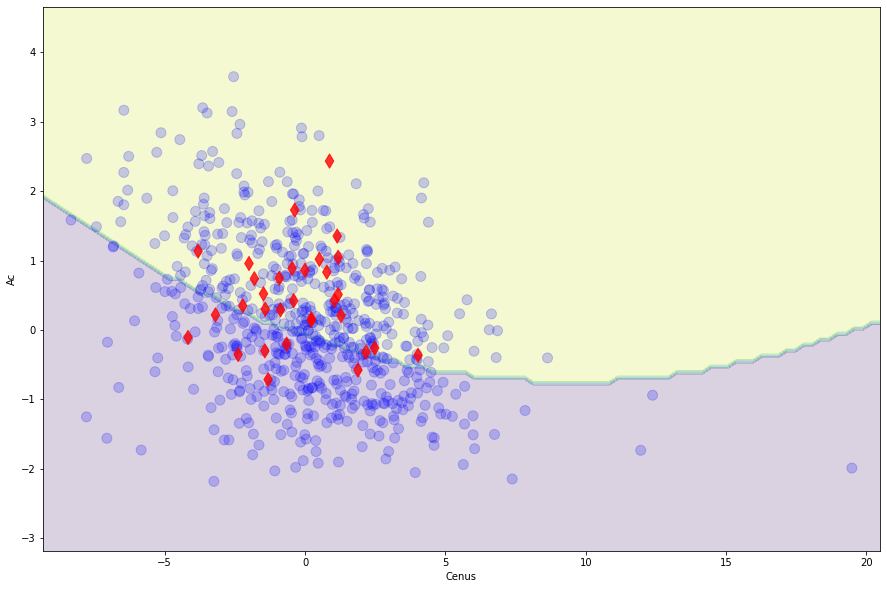

In [ ]:
_ = decision_boundary(classifier,df_test, 1)

In [ ]:
df_train["pred"] = classifier.predict(df_train.iloc[:,:2])
df_test["pred"] = classifier.predict(df_test.iloc[:,:2])

In [ ]:
km_train = km.fit(df_train.stime, df_train.y, df_train.pred)
km_test =  km.fit(df_test.stime, df_test.y, df_test.pred)

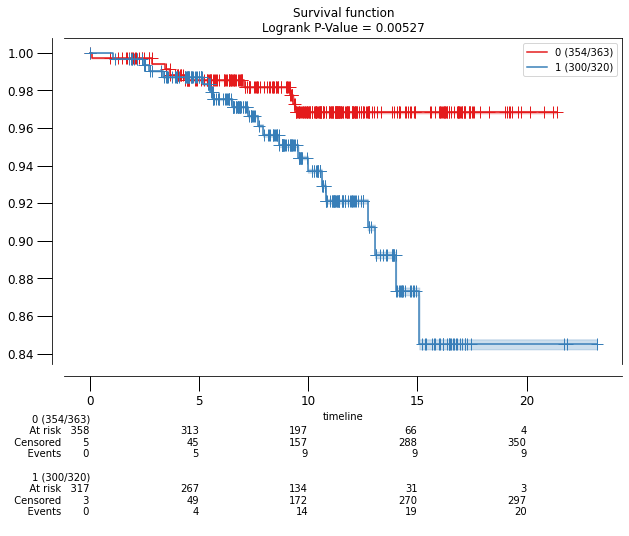

In [ ]:
km.plot(km_train)

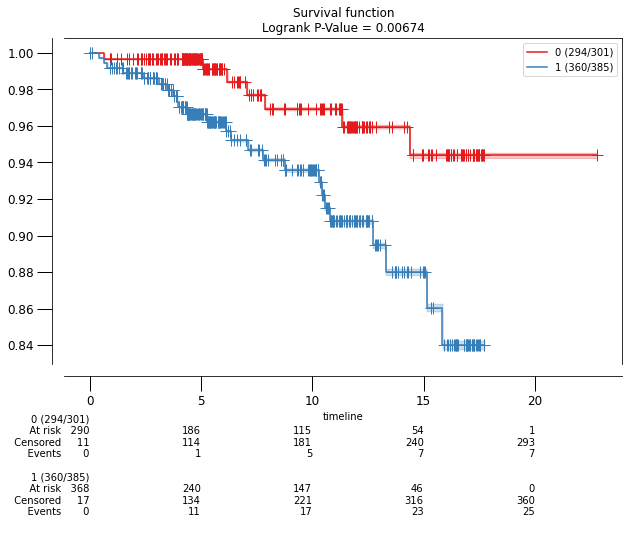

In [ ]:
km.plot(km_test)